In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv(r"C:\Users\kshir\Downloads\codesoft\Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
data.drop(columns=['Cabin'],inplace=True)

In [5]:
#fill missing values 
data['Age'].fillna(data['Age'].median(), inplace=True)


non_missing_values = data['Embarked'].dropna().unique()

nan_indices = data[data['Embarked'].isnull()].index
for idx in nan_indices:
    data.at[idx, 'Embarked'] = np.random.choice(non_missing_values)
print(data['Age'])
print(data['Embarked'])

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64
0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object


In [6]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
print(data['Sex'])
print(data['Embarked'])

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64
0      0
1      1
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    1
890    2
Name: Embarked, Length: 891, dtype: int64


In [7]:
from sklearn.model_selection import train_test_split

# Select features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = data[features]
y = data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("X_train (features for training):")
print(X_train.head())
print("\ny_train (labels for training):")
print(y_train.head())

print("\nX_test (features for testing):")
print(X_test.head())
print("\ny_test (labels for testing):")
print(y_test.head())


X_train (features for training):
     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
331       1    0  45.5      0      0  28.5000         0
733       2    0  23.0      0      0  13.0000         0
382       3    0  32.0      0      0   7.9250         0
704       3    0  26.0      1      0   7.8542         0
813       3    1   6.0      4      2  31.2750         0

y_train (labels for training):
331    0
733    0
382    0
704    0
813    0
Name: Survived, dtype: int64

X_test (features for testing):
     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
709       3    0  28.0      1      1  15.2458         1
439       2    0  31.0      0      0  10.5000         0
840       3    0  20.0      0      0   7.9250         0
720       2    1   6.0      0      1  33.0000         0
39        3    1  14.0      1      0  11.2417         1

y_test (labels for testing):
709    1
439    0
840    0
720    1
39     1
Name: Survived, dtype: int64


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
print(y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy}')


[0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1]
Test Accuracy: 0.8268156424581006


Cross-validation scores: [0.7877095  0.80898876 0.85955056 0.7752809  0.82022472]
Mean CV score: 0.8103508882053857


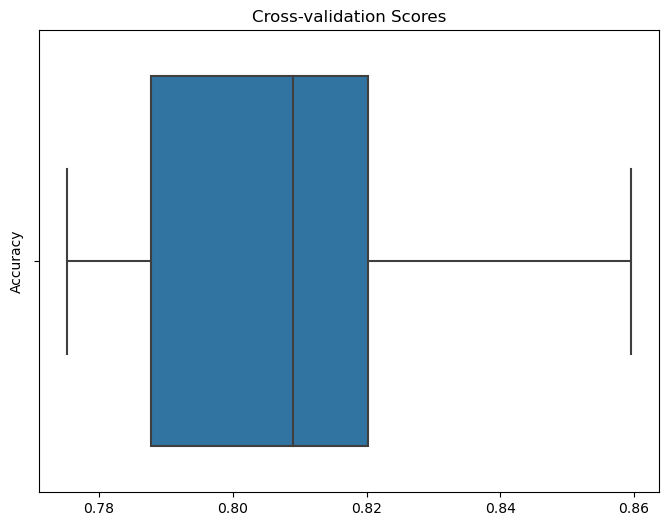

Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 20, 'n_estimators': 200}
Best cross-validation score: 0.8272037821333595


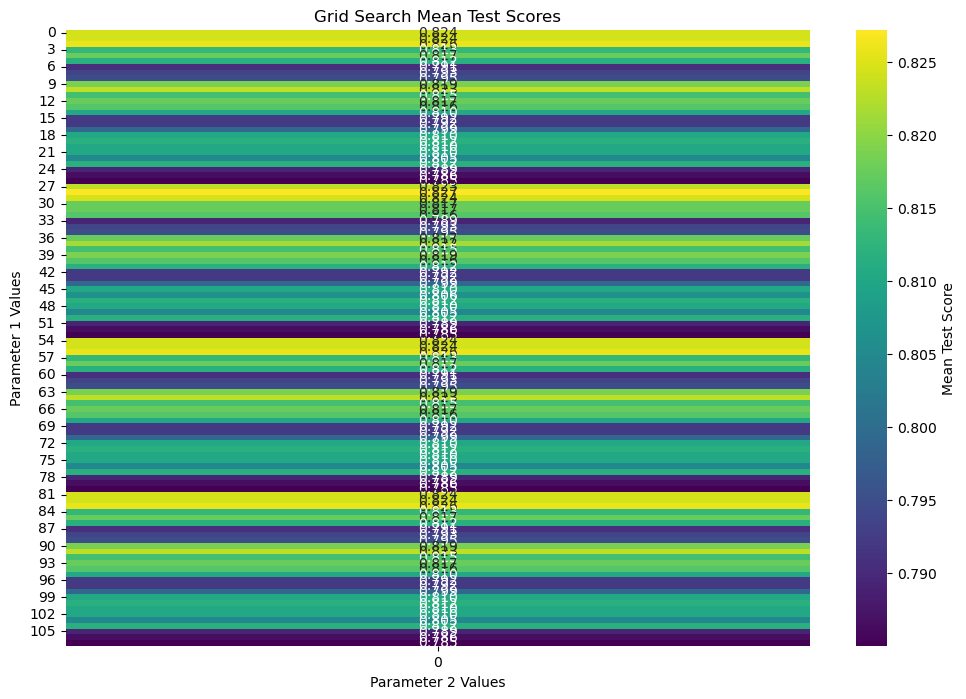

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, GridSearchCV

# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean CV score: {cv_scores.mean()}')

plt.figure(figsize=(8, 6))
sns.boxplot(x=cv_scores)
plt.title('Cross-validation Scores')
plt.ylabel('Accuracy')
plt.show()

# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [20, 40, 80],
    'min_samples_leaf': [4, 8, 16]
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation score: {grid_search.best_score_}')

# Extract mean test scores from results
results = grid_search.cv_results_
mean_test_scores = results['mean_test_score']

# Reshape mean test scores to a single column
scores = np.array(mean_test_scores).reshape(-1, 1)

plt.figure(figsize=(12, 8))
sns.heatmap(scores, annot=True, fmt=".3f", cmap="viridis", cbar_kws={'label': 'Mean Test Score'})
plt.title('Grid Search Mean Test Scores')
plt.xlabel('Parameter 2 Values')
plt.ylabel('Parameter 1 Values')
plt.show()
